In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.utils import shuffle


import pandas as pd
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz
from datetime import datetime
from pathlib import Path

/home/matt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
DATA_PATH = Path('data/')

import warnings
warnings.filterwarnings('ignore')

def load_feather(filepath, **kwargs):
    '''
    input: (path to feather file)
    read feather file to pandas dataframe
    output: (pandas dataframe)
    '''
    return pd.read_feather(filepath, **kwargs)

ratings = load_feather(DATA_PATH/'ratings_explicit_clean.feather')
ratings.drop(['index'], axis=1, inplace=True)
users = load_feather(DATA_PATH/'users_clean.feather')
books = load_feather(DATA_PATH/'books_clean.feather')

In [3]:
counts_users = ratings.User_ID.value_counts()
counts_ratings = ratings.Book_Rating.value_counts()
sample_ratings = ratings[ratings['User_ID'].isin(counts_users[counts_users >= 200].index)]
sample_ratings = sample_ratings[ratings['Book_Rating'].isin(counts_ratings[counts_ratings >= 200].index)]
isbn_group = sample_ratings.groupby('ISBN', as_index=False)['Book_Rating'].count()
sample_ratings = sample_ratings[sample_ratings.ISBN.isin(list(isbn_group[isbn_group.Book_Rating > 1].ISBN.values))]
print(sample_ratings.shape)

book_ratings = sample_ratings.pivot_table(index='User_ID', columns='ISBN', values='Book_Rating').fillna(0)
book_ratings.head()

(24036, 3)


ISBN,0001056107,0002570122,0006157629,000624565X,0006379702,0006472427,000648302X,0006496423,000649840X,0006498744,...,8485224752,8486433525,8489669635,849550121X,8496246620,9500700891,9500723549,9536000444,9706612084,O67174142X
User_ID,,,,,,,,,,,,,,,,,,,,,
2276,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4385,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6242,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6251,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0




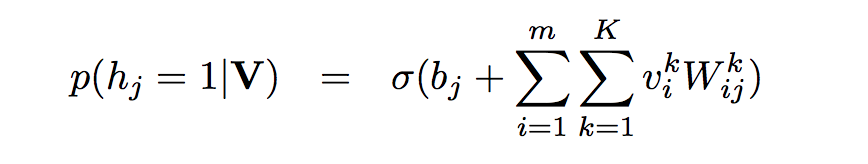


Probability of hidden given visible 

Probability of visible given hidden 

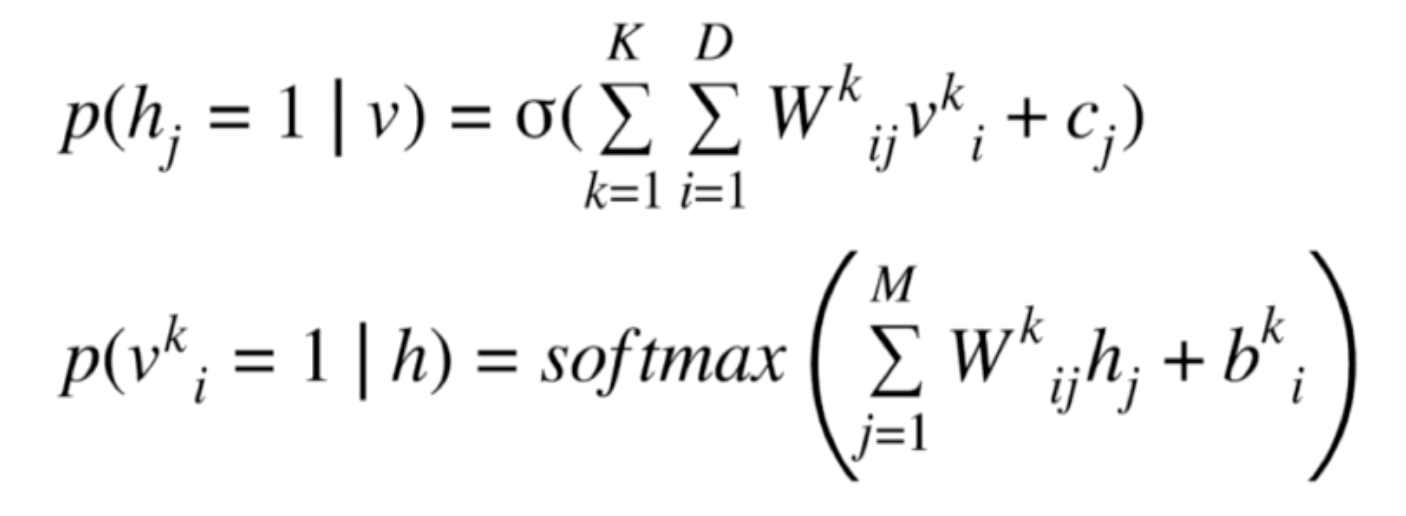


Free Energy

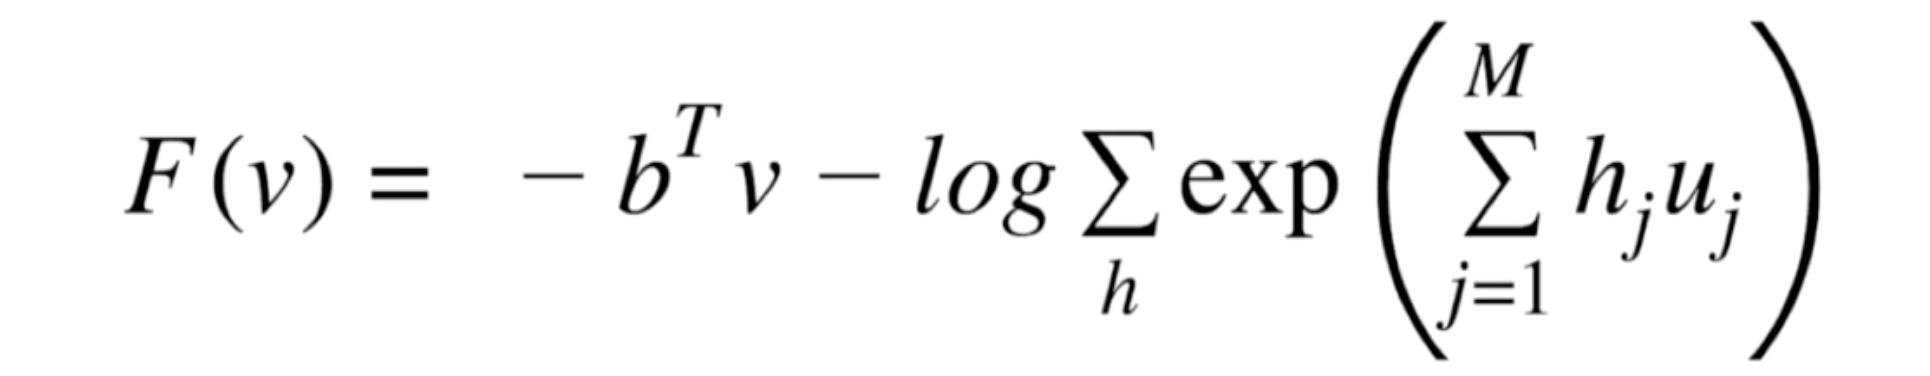

In [15]:
A2 = load_npz('data/Atrain.npz')
A_test2 = load_npz('data/Atest.npz')

A2.shape

# rbm = RBM(D, 50, 10)

(77805, 185973)

In [50]:
preds = rbm.transform(np.array(A[0, :].todense()))

one_to_ten = np.arange(1, 11)


preds.dot(one_to_ten)

N, D, K = preds.shape
out = np.zeros((N, D))
# each predicted rating is a weighted average using the probabilities
for n in range(N):
    for d in range(D):
        out[n,d] = preds[n,d].dot(one_to_ten)
out

array([[5.47760293, 5.44292958, 5.49822992, ..., 5.44568589, 5.48469812,
        5.5686751 ]])

In [37]:
test_user = A[1000, :].todense()
test_user_mask = test_user == 0
print(test_user[test_user_mask].shape[1])
test_user_mask = np.array(test_user_mask)[0]
preds = np.array(rbm.transform(np.array(test_user))).squeeze()
one_to_ten = np.arange(1, 11)
# perform normalization over K values to get probabilities p(vq = k|V) 
# and take the expectation E[vq] as our prediction
preds = preds.dot(one_to_ten)
recs = []
for i, (pred, mask) in enumerate(zip(preds, test_user_mask)):
    if test_user_mask[i]:
        recs.append((i, pred))
# len(preds)
recs = sorted(recs, key=lambda x: x[1], reverse=True)[:10]
print(recs)


    
inverse_book_mapping = {i:j for i, j in enumerate(book_mapping)}
    
orig = []

for i, score in recs:
    orig.append((inverse_book_mapping[i], score))
    
    
# pd.DataFrame(orig, columns=['ISBN', 'score']).merge(books, on='ISBN')

185973
[(819, 6.28662358596921), (629, 6.126166880130768), (206, 6.06837809830904), (2493, 6.061398088932037), (5733, 6.0606431514024734), (505, 6.059839490801096), (1567, 6.046780176460743), (1146, 6.040914446115494), (5543, 6.037062004208565), (280, 6.033439256250858)]


,ISBN,score,Book_Title,Book_Author,Year_Of_Publication,Publisher,language
0,2253063339,6.286624,Les Fourmis,Bernard Werber,2002.0,LGF,fr
1,0439061644,6.126167,"The First Journey (Animorphs. Alternamorphs, 1)",K. A. Applegate,1999.0,Apple Signature (Scholastic),en
2,0345311396,6.068378,Private Screening,Richard North Patterson,1994.0,Ballantine Books,en
3,0809237628,6.061398,"Chris-In-The-Morning: Love, Life, and the Whol...",Louis Chunovic,1993.0,McGraw-Hill,en
4,3492238572,6.060643,Wer hat Angst vorm bÃ?Â¶sen Wolf. Sonderausgabe.,Karin Fossum,2003.0,Piper,de
5,0684854953,6.059839,Santa Pete : A Novel Of Christmas Present And ...,Christopher Moore,1998.0,Simon & Schuster,en
6,0440217520,6.046780,Tunnel Vision (V.I. Warshawski Novels (Paperba...,Sara Paretsky,1995.0,Dell,en
7,068930935X,6.040914,A STRING OF CHANCES (String of Chances Nrf),Phyllis Reynolds Naylor,1982.0,Atheneum,en
8,0345406419,6.037062,Rookery Blues,Jon Hassler,1996.0,Ballantine Books,en
9,0439510112,6.033439,Born Confused,Tanuja Desai Hidier,2003.0,Push,en


# HERE 

In [4]:
%reload_ext autoreload
%autoreload 2

from BookData import BookDataSet
from Evaluator import Evaluator
from EvaluationData import CreateDataSets
from surprise import KNNBasic


def LoadBookData():
    data = BookDataSet(sample_ratings, books, users)
    rankings = data.get_popularity_ranks()
    return (data, rankings)


# Load up common data set for the recommender algorithms
(evaluationData, rankings) = LoadBookData()
print('Book Data Loaded')

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)
print('Evaluator Loaded')

full_data = evaluator.dataset.get_full_train()
train_data = evaluator.dataset.get_train()
test_data = evaluator.dataset.get_test()

N = full_data.n_users
M = full_data.n_items

A_train = get_or_create_sparse(train_data, N, M, load=True, path='data/X_train_surprise_sample.npz')
A_test = get_or_create_sparse_test(test_data, full_data, N, M, load=True, path='data/X_test_surprise_sample.npz')

Book Data Loaded
Evaluator Loaded


NameError: name 'get_or_create_sparse' is not defined

In [13]:
A_train.shape

(145, 8621)

In [6]:
from tensorflow.python.framework import ops


def dot1(V, W):
    # V is N x D x K (N visible units)
    # W is D x K x M (weights)
    # need to sum over D dimension and K dimension
    # returns N x M (hidden layer size)
    return tf.tensordot(V, W, axes=[[1, 2], [0, 1]])

def dot2(H, W):
    # H is N x M (batch of hiddens)
    # W is D x K x M (weights transposed)
    # need to sum over M
    # returns N x D x K (visible)
    return tf.tensordot(H, W, axes=[[1], [2]])


class RBM(object):
    def __init__(self, D, M, K):
        self.D = D
        self.M = M
        self.K = K
        ops.reset_default_graph()
        self.build(D, M, K)
        
    def build(self, D, M, K):
        
        # placeholders
        self.X_in = tf.placeholder(tf.float32, shape=[None, D])
        
        X = tf.cast(self.X_in - 1, tf.int32)
        X = tf.one_hot(X, K)
        
        # Weights and bias 
        self.W = tf.Variable(tf.random_normal(shape=(D, K, M)) * np.sqrt(2.0 / M))
        self.c = tf.Variable(np.zeros(M).astype(np.float32))
        self.b = tf.Variable(np.zeros((D, K)).astype(np.float32))
        
        # contrastive divergance 
        V = X
        p_h_given_v = tf.nn.sigmoid(dot1(V, self.W) + self.c)
        self.p_h_given_v = p_h_given_v
        # draw a sample from p( h | v )
        r = tf.random_uniform(shape=tf.shape(self.p_h_given_v))
        H = tf.to_float(r < self.p_h_given_v)
        
        # draw a sample from p( v | h )
        logits = dot2(H, self.W) + self.b
        cdist = tf.distributions.Categorical(logits=logits)
        X_sample = cdist.sample()
        # turn to (N, D, K)
        X_sample = tf.one_hot(X_sample, K)
        # mask X_sample
        masked2d = tf.cast(self.X_in > 0, tf.float32)
        # repate mask K times
        masked3d = tf.stack([masked2d] * K, axis=-1)
        X_sample = X_sample * masked3d
        
        
        
        # objective function
        objective = tf.reduce_mean(self.free_energy(X)) - tf.reduce_mean(self.free_energy(X_sample))
        self.optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(objective)
        
        # for debugging
        logits = self.forward_logits(X)
        self.loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels=X, logits=logits)) * 100000
        
        # output
        self.output_visible = self.forward_output(X)
        
        # get train SSE loss
        one_to_ten = np.arange(1, 11)
        self.one_to_ten = tf.constant(one_to_ten.astype(np.float32))
        self.pred = tf.tensordot(self.output_visible, self.one_to_ten, axes=[[2], [0]])
        mask = tf.cast(self.X_in > 0, tf.float32)
        self.sse = tf.reduce_sum(mask * tf.square((self.X_in - self.pred)))
        # test SSE
        self.X_test = tf.placeholder(tf.float32, shape=[None, D])
        test_mask = tf.cast(self.X_test > 0, tf.float32)
        self.test_sse = tf.reduce_sum(test_mask * tf.square((self.X_test - self.pred)))
        
        # create session and intit variables 
        self.set_session()
      
    def set_session(self):
        init = tf.global_variables_initializer()
        self.sess = tf.Session()
        self.sess.run(init)
        
    def fit(self, X, X_test=None, epochs=10, batch_size=100):
        K = self.K
        N, D = X.shape
        self.batch_size = batch_size
        self.n_batches = N // batch_size
            
        self.train_mses = []
        self.test_mses = []
        for epoch in range(epochs):
            print('.....Training Begins.....')
            start = datetime.now()
            X, X_test = shuffle(X, X_test)
            # Do I really need to shuffle the test data? 
#             X = shuffle(X)
            for i in range(self.n_batches):
                # get batch
                batch_X = X[i * batch_size : (i * batch_size + batch_size)].toarray()
                
                _, cost = self.sess.run([self.optimizer, self.loss], 
                                        feed_dict={self.X_in: batch_X})
                if i % 100 == 0:
                    print('epoch: {} -- i / n_batches: {} / {} -- cost: {}'.format(epoch, i, self.n_batches, cost))
                    
            print('epoch train time: {}'.format(datetime.now() - start))
            
            self.evaluate(X, X_test)
            
            # get metrics
    def evaluate(self, X, X_test):
            batch_size = self.batch_size
            start = datetime.now()
            sse = 0
            test_sse = 0
            n = 0
            n_test = 0
            for i in range(self.n_batches):
                batch_X = X[i * batch_size : (i * batch_size + batch_size)].toarray()
                # the test preds come from the training data
                batch_X_test = X_test[i * batch_size : (i * batch_size + batch_size)].toarray()
                
                n += np.count_nonzero(batch_X)
                n_test += np.count_nonzero(batch_X_test)
                
                batch_sse, batch_test_sse = self.get_sse(batch_X, batch_X_test)
                sse += batch_sse
                test_sse += batch_test_sse
            
            mse = sse / n
            test_mse = test_sse / n_test
            print('train mse: {} / rmse: {}'.format(mse, np.sqrt(mse)))
            print('test mse: {} / rmse: {}'.format(test_mse, np.sqrt(test_mse)))
            print('prediction time: {}'.format(datetime.now() - start))
            self.train_mses.append(mse)
            self.test_mses.append(test_mse)

        
    def get_sse(self, X, X_t):
        return self.sess.run([self.sse, self.test_sse], 
                             feed_dict={self.X_in: X, self.X_test: X_t})
    
    def free_energy(self, V):
        term1 = -tf.reduce_sum(dot1(V, self.W) + self.c)
        term2 = -tf.reduce_sum(tf.nn.softplus(dot1(V, self.W) + self.c), axis=1)
        return term1 + term2
    
    def forward_hidden(self, X):
        return tf.nn.sigmoid(dot1(X, self.W) + self.c)
    
    def forward_logits(self, X):
        Z = self.forward_hidden(X)
        return dot2(Z, self.W) + self.b
    
    def forward_output(self, X):
        Z = self.forward_logits(X)
        return tf.nn.softmax(Z)
        
    def get_visible(self, X):
        return self.sess.run(self.output_visible, feed_dict={self.X_in: X})
    
    def transform(self, X):
        return self.sess.run(self.output_visible, feed_dict={self.X_in: X})

In [7]:
from surprise import AlgoBase
from surprise import PredictionImpossible

from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz
    
def get_or_create_sparse(trainset=None, N=None, M=None, 
                         path='data/X_train_surprise.npz', load=True):    
    if load:
        A = load_npz(path)
        print('sparse dataset loaded')
        return A
    else:     
        A = lil_matrix((N, M))
        for (uid, iid, rating) in trainset.all_ratings():
            i = int(uid)
            j = int(iid)
            A[i, j] = rating
        A = A.tocsr()
        save_npz(path, A)
        print('sparse dataset created and loaded')
        return A
    
    
def get_or_create_sparse_test(testset=None, fulldata=None, N=None, M=None, 
                              path='data/X_test_surprise.npz', load=True):    
    if load:
        A = load_npz(path)
        print('sparse dataset loaded')
        return A
    else:     
        A = lil_matrix((N, M))
        for uid, iid, rating in testset:
            i = int(fulldata.to_inner_uid(uid))
            j = int(fulldata.to_inner_iid(iid))
            A[i, j] = rating
        A = A.tocsr()
        save_npz(path, A)
        print('sparse dataset created and loaded')
        return A


class RBMModel(AlgoBase):
    def __init__(self, epochs=1, hidden=50, batch_size=128, params={}):
        AlgoBase.__init__(self)
        self.epochs = epochs
        self.hidden = hidden
        self.batch_size = batch_size
        self.book_data = BookDataSet(ratings, books, users)
        self.stoplist = ['sex', 'drug', 'race']
        
    def build_stop_list(self, trainset):
        self.stoplist_lookup = {}
        for iid in trainset.all_items():
            self.stoplist_lookup[iid] = False
            book_id = trainset.to_raw_iid(iid)
            title = self.book_data.get_book_name(book_id)
            if title:
                title = title.lower()
                for term in self.stoplist:
                    if term in title:
                        self.stoplist_lookup[iid] = True
    
        
    def fit(self, trainset):
        AlgoBase.fit(self, trainset)
        
        N = trainset.n_users
        D = trainset.n_items
#         print(N, D)

#         full_data = evaluator.dataset.get_full_train()
#         train_data = evaluator.dataset.get_train()
#         test_data = evaluator.dataset.get_test()
        
        self.trainingMatrix = get_or_create_sparse(load=True, path='data/X_train_surprise.npz')
        self.testMatrix = get_or_create_sparse_test(load=True, path='data/X_test_surprise.npz')
        
        N, D = self.trainingMatrix.shape
#         print(N, D) 
        self.rbm = RBM(D, self.hidden, 10)
        self.rbm.fit(self.trainingMatrix, self.testMatrix, epochs=self.epochs, batch_size=self.batch_size)

#         self.predictedRatings = rbm.model.transform(testMatrix)    
    
    def estimate(self, u, i):

        if not (self.trainset.knows_user(u) and self.trainset.knows_item(i)):
            raise PredictionImpossible('User and/or item is unkown.')
        
#         print('u', u)
#         print(self.trainset.to_raw_uid(u))
#         print(self.trainset.ur[u])
#         print('LEN1', len(self.trainset.ur[u]))
#         print(self.trainingMatrix[u, :].todense())
#         print('LEN2', np.count_nonzero(np.array(self.trainingMatrix[u, :].todense())[0]))
        # make sure surprise user is the same as the trainingMatrix user 
        assert(len(self.trainset.ur[u]) == np.count_nonzero(np.array(self.trainingMatrix[u, :].todense())[0]))
#         rating = self.predictedRatings[u, i]
        test_user = self.trainingMatrix[u, :].todense()
    
#         print('i', i)
        item_id = i
        test_user_mask = test_user == 0
        test_user_mask = np.array(test_user_mask)[0]
        preds = np.array(self.rbm.transform(np.array(test_user))).squeeze()
        one_to_ten = np.arange(1, 11)
        # perform normalization over K values to get probabilities p(vq = k|V) 
        # and take the expectation E[vq] as our prediction
        preds = preds.dot(one_to_ten)
        rating = preds[item_id]
        
        if (rating < 0.001):
            raise PredictionImpossible('No valid prediction exists.')
            
        return rating

In [8]:
%reload_ext autoreload
%autoreload 2

from BookData import BookDataSet
from Evaluator import Evaluator
from EvaluationData import CreateDataSets
from surprise import KNNBasic


def LoadBookData():
    bs = BookDataSet(ratings, books, users)
    rankings = bs.get_popularity_ranks()
    data = bs.load_ratings_dataset(remove_outliers=False)
    return (data, rankings)


# Load up common data set for the recommender algorithms
(evaluationData, rankings) = LoadBookData()
print('Book Data Loaded')

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)
print('Evaluator Loaded')


knn = KNNBasic()
evaluator.add_model(knn, "knn")
print('KNN Model Created')

#RBM
customRBM = RBMModel(hidden=100, batch_size=64, epochs=10)
evaluator.add_model(customRBM, "customRBM")
print('customRBM Model Created')

# Fight!
evaluator.evaluate(topN=False)

# sample user 
# evaluator.recommend_top_books(evaluationData, test_user_id=177458)

Book Data Loaded
Evaluator Loaded
KNN Model Created
customRBM Model Created
Evaluating  knn ...
Evaluating accuracy...
Computing the msd similarity matrix...
Done computing similarity matrix.
Training Time: 0:01:07.761497
Prediction Time: 0:00:04.846617
Analysis complete.
Evaluating  customRBM ...
Evaluating accuracy...
sparse dataset loaded
sparse dataset loaded


ResourceExhaustedError: OOM when allocating tensor of shape [185973,10,100] and type float
	 [[Node: Variable/Adam/Initializer/zeros = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [185973,10,100] values: [[0 0 0]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]

Caused by op 'Variable/Adam/Initializer/zeros', defined at:
  File "/home/matt/anaconda3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/home/matt/anaconda3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/matt/anaconda3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 478, in start
    self.io_loop.start()
  File "/home/matt/anaconda3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/home/matt/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2856, in run_ast_nodes
    if self.run_code(code, result):
  File "/home/matt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-8-e5e1981f0a7e>", line 36, in <module>
    evaluator.evaluate(topN=False)
  File "/home/matt/Desktop/DataScience/fellowship/Evaluator.py", line 19, in evaluate
    results[model.name] = model.evaluate_model(self.dataset, topN)
  File "/home/matt/Desktop/DataScience/fellowship/EvaluatedAlgorithm.py", line 17, in evaluate_model
    self.model.fit(evaluationData.get_train())
  File "<ipython-input-7-dbad5387e85d>", line 80, in fit
    self.rbm = RBM(D, self.hidden, 10)
  File "<ipython-input-6-be0769bfd0f5>", line 25, in __init__
    self.build(D, M, K)
  File "<ipython-input-6-be0769bfd0f5>", line 64, in build
    self.optimizer = tf.train.AdamOptimizer(learning_rate=0.05).minimize(objective)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 409, in minimize
    name=name)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 585, in apply_gradients
    self._create_slots(var_list)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/adam.py", line 127, in _create_slots
    self._zeros_slot(v, "m", self._name)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/optimizer.py", line 1130, in _zeros_slot
    new_slot_variable = slot_creator.create_zeros_slot(var, op_name)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/slot_creator.py", line 181, in create_zeros_slot
    colocate_with_primary=colocate_with_primary)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/slot_creator.py", line 155, in create_slot_with_initializer
    dtype)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/training/slot_creator.py", line 65, in _create_slot_var
    validate_shape=validate_shape)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1336, in get_variable
    constraint=constraint)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 1098, in get_variable
    constraint=constraint)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 435, in get_variable
    constraint=constraint)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 404, in _true_getter
    use_resource=use_resource, constraint=constraint)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 796, in _get_single_variable
    use_resource=use_resource)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2261, in variable
    use_resource=use_resource)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2251, in <lambda>
    previous_getter = lambda **kwargs: default_variable_creator(None, **kwargs)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 2234, in default_variable_creator
    constraint=constraint)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 259, in __init__
    constraint=constraint)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variables.py", line 368, in _init_from_args
    initial_value(), name="initial_value", dtype=dtype)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/variable_scope.py", line 780, in <lambda>
    shape.as_list(), dtype=dtype, partition_info=partition_info)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py", line 99, in __call__
    return array_ops.zeros(shape, dtype)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/array_ops.py", line 1550, in zeros
    output = fill(shape, constant(zero, dtype=dtype), name=name)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/gen_array_ops.py", line 2794, in fill
    "Fill", dims=dims, value=value, name=name)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 787, in _apply_op_helper
    op_def=op_def)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 432, in new_func
    return func(*args, **kwargs)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3206, in create_op
    op_def=op_def)
  File "/home/matt/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1701, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

ResourceExhaustedError (see above for traceback): OOM when allocating tensor of shape [185973,10,100] and type float
	 [[Node: Variable/Adam/Initializer/zeros = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [185973,10,100] values: [[0 0 0]]...>, _device="/job:localhost/replica:0/task:0/device:GPU:0"]()]]


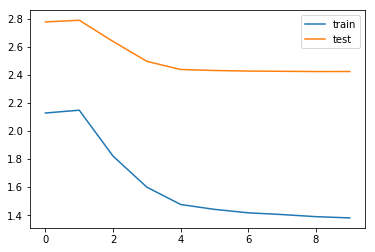

In [13]:
plt.plot(np.sqrt(customRBM.rbm.train_mses), label='train')
plt.plot(np.sqrt(customRBM.rbm.test_mses), label='test')
plt.legend();

In [7]:
evaluator.recommend_top_books(evaluationData, test_user_id=177458)


Using recommender  Random

Building recommendation model...
Computing the msd similarity matrix...


MemoryError: 

In [4]:
from scipy.sparse import lil_matrix, csr_matrix, save_npz, load_npz
    
def get_or_create_sparse(trainset, N, M, path='data/X_train_surprise.npz', load=True):    
    if load:
        A = load_npz(path)
        print('sparse dataset loaded')
        return A
    else:     
        A = lil_matrix((N, M))
        for (uid, iid, rating) in trainset.all_ratings():
            i = int(uid)
            j = int(iid)
            A[i, j] = rating
        A = A.tocsr()
        save_npz(path, A)
        print('sparse dataset created and loaded')
        return A
    
    
def get_or_create_sparse_test(testset, fulldata, N, M, path='data/X_test_surprise.npz', load=True):    
    if load:
        A = load_npz(path)
        print('sparse dataset loaded')
        return A
    else:     
        A = lil_matrix((N, M))
        for uid, iid, rating in testset:
            i = int(fulldata.to_inner_uid(uid))
            j = int(fulldata.to_inner_iid(iid))
            A[i, j] = rating
        A = A.tocsr()
        save_npz(path, A)
        print('sparse dataset created and loaded')
        return A

In [5]:
%reload_ext autoreload
%autoreload 2


from BookData import BookDataSet
from Evaluator import Evaluator
from EvaluationData import CreateDataSets


# tf.reset_default_graph()
def LoadBookData():
    data = BookDataSet(ratings, books, users)
    rankings = data.get_popularity_ranks()
    return (data, rankings)


# Load up common data set for the recommender algorithms
(evaluationData, rankings) = LoadBookData()

# Construct an Evaluator to, you know, evaluate them
evaluator = Evaluator(evaluationData, rankings)

In [6]:
full_data = evaluator.dataset.get_full_train()
train_data = evaluator.dataset.get_train()
test_data = evaluator.dataset.get_test()

N = full_data.n_users
M = full_data.n_items

A_train = get_or_create_sparse(train_data, N, M, load=False)
A_test = get_or_create_sparse_test(test_data, full_data, N, M, load=False)

sparse dataset created and loaded


In [69]:


for i, b, r in test_data[:10]:
    print((full_data.to_inner_uid(i), full_data.to_inner_iid(b), r))

(13, 2133, 10)
(6, 519, 8)
(86, 2197, 10)
(7, 1629, 7)
(92, 8081, 8)
(35, 5081, 10)
(130, 5594, 9)
(94, 3344, 8)
(102, 4802, 10)
(73, 7488, 5)


In [61]:
n = 0
for i in train_data.all_ratings():
    print(i)
    n +=1
    if n > 10: break

(0, 0, 5)
(0, 22, 5)
(0, 47, 5)
(0, 51, 5)
(0, 133, 5)
(0, 168, 5)
(0, 217, 5)
(0, 248, 5)
(0, 460, 5)
(0, 461, 5)
(0, 499, 5)


In [24]:
train_set.all_users()

range(0, 145)

In [18]:
n = 0
for i in train_set.all_ratings():
    print(i)
    n +=1
    if n > 10: break

(0, 0, 5)
(0, 22, 5)
(0, 47, 5)
(0, 51, 5)
(0, 133, 5)
(0, 168, 5)
(0, 217, 5)
(0, 248, 5)
(0, 460, 5)
(0, 461, 5)
(0, 499, 5)


In [20]:
test_set = evaluator.dataset.get_test()

In [12]:
ed = CreateDataSets(evaluationData, rankings)